# Data Visualisation 7 - Seaborn regplot

In this notebook I demonstrate how to use the seaborn regplot to create plots with a simple linear regression line fitted to them. If we fit a regression model to analyse data it can often be useful to visualise the model by overlaying the regression line onto a scatterplot of the data points. The seaborn regplot is a versatile way to create such visualisation when we have one independent variable and one dependent variable. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("health_new.csv")

df.head()

,timedrs,phyheal,menheal,stress,religion,race
0,1,5,8,265,3,1
1,3,4,6,415,3,1
2,0,3,4,92,2,1
3,13,2,2,241,1,1
4,15,3,6,86,4,1


<AxesSubplot:xlabel='stress', ylabel='menheal'>

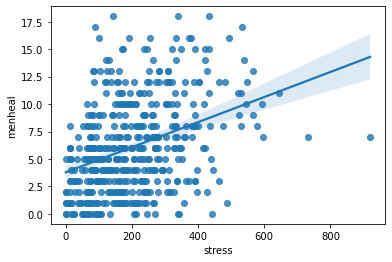

In [3]:
sns.regplot(data = df, x = 'stress', y = 'menheal')

<AxesSubplot:xlabel='stress', ylabel='menheal'>

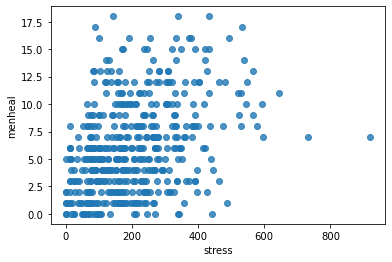

In [4]:
sns.regplot(data = df, x = 'stress', y = 'menheal', fit_reg=False)

<AxesSubplot:xlabel='stress', ylabel='menheal'>

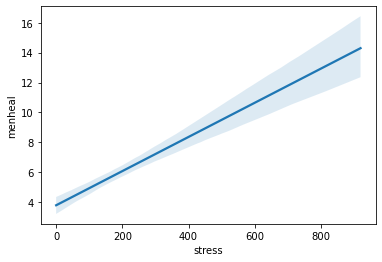

In [5]:
sns.regplot(data = df, x = 'stress', y = 'menheal', scatter=False)

<AxesSubplot:xlabel='stress', ylabel='menheal'>

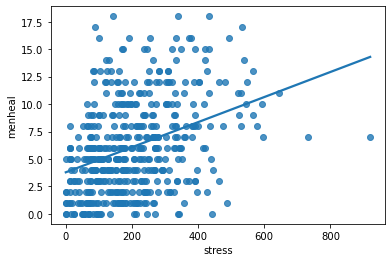

In [6]:
# Note that seaborn gives us confidence intervals (CIs) around the regression line. These are bootstrapped CIs. 
# We can turn the CIs off. 
sns.regplot(data = df, x = 'stress', y = 'menheal', ci=None)

<AxesSubplot:xlabel='stress', ylabel='menheal'>

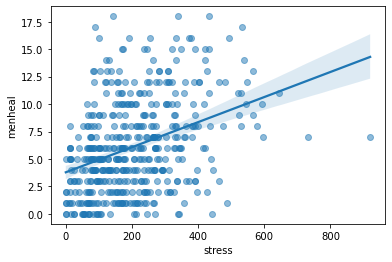

In [7]:
sns.regplot(data = df, x = 'stress', y = 'menheal', scatter_kws = {'alpha': 0.5})

<AxesSubplot:xlabel='stress', ylabel='menheal'>

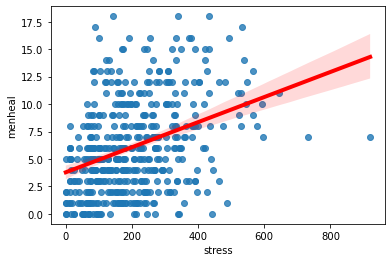

In [9]:
sns.regplot(data = df, x = 'stress', y = 'menheal', line_kws = {'lw': 4, 'color': 'r'})

In [10]:
diamonds = sns.load_dataset('diamonds')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
diamonds.shape

(53940, 10)

In [12]:
diamonds = diamonds.sample(n=200, random_state=44)

diamonds.shape

(200, 10)

<AxesSubplot:xlabel='carat', ylabel='price'>

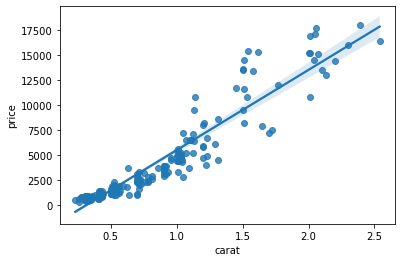

In [13]:
sns.regplot(data = diamonds, x='carat', y='price')

In [14]:
cut_discrete = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium' : 4, 'Ideal' :5 }

diamonds['cut_disc'] = diamonds['cut'].map(cut_discrete)

In [15]:
diamonds['cut_disc'].value_counts()

5    80
4    63
3    39
2    11
1     7
Name: cut_disc, dtype: int64

In [16]:
diamonds['cut_disc'] = diamonds['cut_disc'].cat.as_ordered()

<AxesSubplot:xlabel='cut_disc', ylabel='price'>

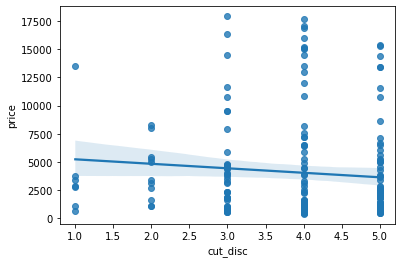

In [17]:
sns.regplot(data = diamonds, x='cut_disc', y='price')

In [18]:
diamonds.dtypes

carat        float64
cut         category
color       category
clarity     category
depth        float64
table        float64
price          int64
x            float64
y            float64
z            float64
cut_disc    category
dtype: object

In [19]:
diamonds['cut_disc'] = pd.factorize(diamonds['cut_disc'])[0]

In [20]:
diamonds.dtypes

carat        float64
cut         category
color       category
clarity     category
depth        float64
table        float64
price          int64
x            float64
y            float64
z            float64
cut_disc       int64
dtype: object

<AxesSubplot:xlabel='cut_disc', ylabel='price'>

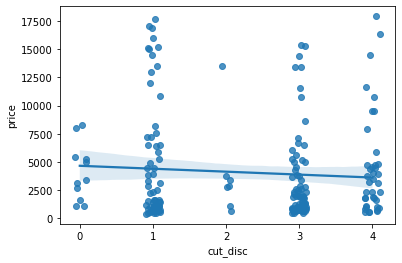

In [21]:
sns.regplot(data = diamonds, x='cut_disc', y='price', x_jitter=0.1)

<AxesSubplot:xlabel='cut_disc', ylabel='price'>

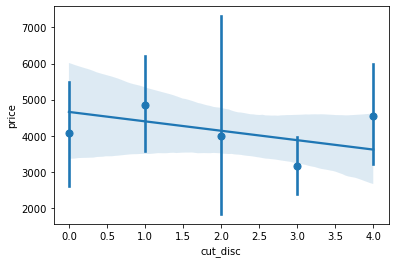

In [22]:
sns.regplot(data = diamonds, x='cut_disc', y='price', x_estimator=np.mean)

<AxesSubplot:xlabel='carat', ylabel='price'>

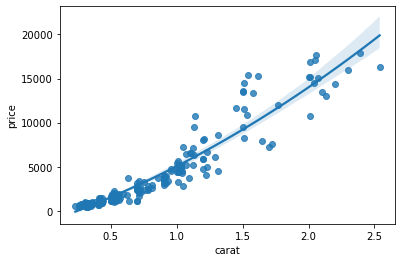

In [23]:
# Fitting higher order polynomials. 

sns.regplot(data = diamonds, x='carat', y='price', order=2)

In [24]:
x_var = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
y_var = [0.5, 2.1, 2.8, 3.5, 4.7, 6, 7.2, 8, 8.7, 9.5, 24]

<AxesSubplot:>

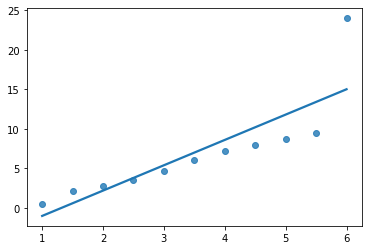

In [25]:
sns.regplot(x=x_var, y=y_var, ci=None)

<AxesSubplot:>

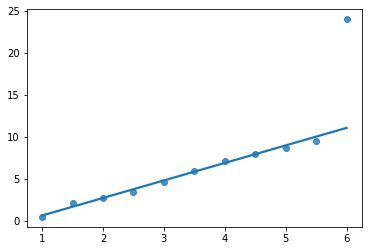

In [26]:
sns.regplot(x=x_var, y=y_var, ci=None, robust=True)